# Traning Agent with DQN

## Step 1: Import the libraries

In [2]:
import time
import random
import math
from collections import deque

import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt
import torch

from gym_unity.envs import UnityEnv

In [1]:
from dqn_agent import DQNAgent
from model import DQNLinear

## Step 2: Create our environment

Initialize the environment in the code cell below.


In [3]:
ENV_PATH = '../unity_envs/Basic/'
ENV_NAME = 'Unity Environment'
env = UnityEnv(ENV_PATH + ENV_NAME, worker_id=0, no_graphics=True)

INFO:mlagents_envs:Connected new brain:
Basic?team=0
INFO:gym_unity:1 agents within environment.


In [4]:
# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device: ", device)

Device:  cuda


## Step 3: Viewing our Enviroment

In [5]:
print("The size of frame is: ", env.observation_space.shape[0])
print("No. of Actions: ", env.action_space)

The size of frame is:  20
No. of Actions:  MultiDiscrete([3])


## Step 4: Creating our Agent

In [6]:
STATE_SIZE = env.observation_space.shape[0]
ACTION_SIZE = 3
GAMMA = 0.99           # discount factor
BUFFER_SIZE = int(1e5)      # replay buffer size
BATCH_SIZE = 32        # Update batch size
LR = 1e-3              # learning rate 
TAU = 1e-2             # for soft update of target parameters
UPDATE_EVERY = 5       # how often to update the network 

agent = DQNAgent(STATE_SIZE, ACTION_SIZE, BUFFER_SIZE, BATCH_SIZE, GAMMA, LR, TAU, UPDATE_EVERY, device)

## Step 5: Creating Helper Function

### Eplision Helper Function

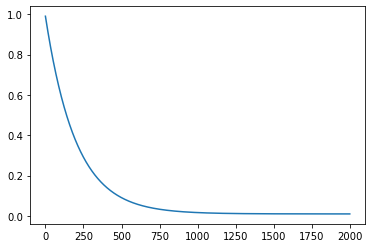

In [7]:
EPS_START = 0.99       # starting value of epsilon
EPS_END = 0.01         # Ending value of epsilon
EPS_DECAY = 200        # Rate by which epsilon to be decayed

epsilon_by_epsiode = lambda frame_idx: EPS_END + (EPS_START - EPS_END) * math.exp(-1. * frame_idx / EPS_DECAY)

plt.plot([epsilon_by_epsiode(i) for i in range(2000)])
plt.show()

### Plot Traning

In [8]:
def plot_result(scores):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()


## Step 6: Train the Agent with DQN

In [9]:
def train(n_episodes, scores_average_window, benchmark_reward):
    """
    Params
    ======
        n_episodes (int): maximum number of training episodes
        benchmark_reward (float): benchmark reward at which environment is solved.
    """
    scores = []
    scores_window = deque(maxlen=scores_average_window)
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        eps = epsilon_by_epsiode(i_episode)
        while True:
            action = agent.act(state, eps)
            next_state, reward, done, info = env.step(action)
            score += reward
            agent.step(state, action, reward, next_state, done)
            if done:
                break
            else:
                state = next_state
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        
        # printing and ploting results
        clear_output(wait=True)
        plot_result(scores)
        print('\rEpisode {}\tAverage Score: {:.2f}\tEplision: {:.3f}'.format(i_episode, np.mean(scores_window), eps))
        
        if float(np.mean(scores_window)) >= benchmark_reward:
            agent.save_model("basic_solved.pth", scores)
            print("Yah Environment is solved :)")
            break
    
    return scores

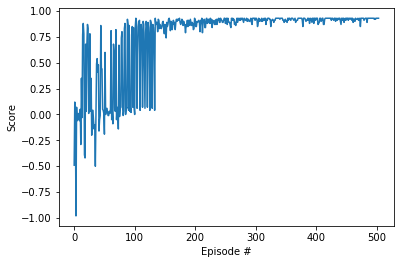

Episode 504	Average Score: 0.92	Eplision: 0.089
Yah Environment is solved :)
Done Training


In [10]:
BENCHMARK_REWARD = 0.9300
SCORES_AVERAGE_WINDOW = 100
NUM_EPISODES = 2000

scores = train(NUM_EPISODES, SCORES_AVERAGE_WINDOW, BENCHMARK_REWARD)
print("Done Training")

In [11]:
env.close()

INFO:mlagents_envs:Environment shut down with return code 0 (CTRL_C_EVENT).
